# MNIST Digit '2' Analysis
This notebook covers data centering, covariance matrix computation, and Principal Component Analysis (PCA) to visualize and understand image data. It's a part of an IIT-M assignment.

**Note to Learners:**

- random_state = 0 (seed)

- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.




## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [ ]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

## Problem-1

How many samples does the dataset have?

In [ ]:
# Enter your solution here
n = len(X)
n

100

## Problem-2

How many features does the dataset have?

In [ ]:
# Enter your solution here
d = len(X[0])
d

784

## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

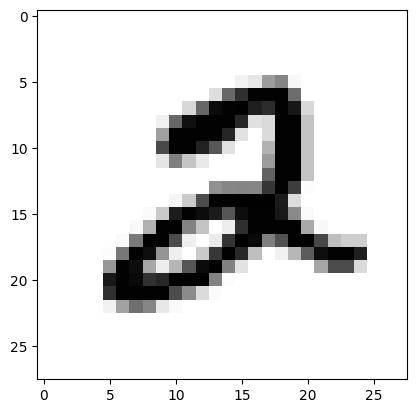

<Figure size 640x480 with 0 Axes>

In [ ]:
# Enter your solution here
import matplotlib.pyplot as plt

image = X[0].reshape(28,28)
plt.imshow(image, cmap="gray_r")
plt.show()
plt.clf() # clear the clutter otherwise it may make mess

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [ ]:
# Enter your solution here
x_mean = np.mean(X) # get the mean

if x_mean <0 :   # a single -ve value can ruin the entire code
  x_mean = -x_mean

x_prime = X - x_mean # get the centered X and rename it as X' (x_prime)
# print(x_prime)

x_rt_sq_sum = np.sqrt(np.sum(x_prime**2)) # sq root of the sum of the squares of all x_primes

form_prob_4 = x_rt_sq_sum/(n*d) # formula of the problem 4

print(f'answer of problem-4 is: {form_prob_4:.2f}') # with a 2 decimal hood
form_prob_4

answer of problem-4 is: 0.30


np.float64(0.29762153673741826)

## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [ ]:
# Enter your solution here

# get the covarience of this centered X; denoted as x_prime
cov_x_prime = np.cov(x_prime, rowvar=False) # used numpy np.cov() to calculate cov matrix. but this by default calc w/ n=100

cov_x_rt_sq_sum = np.sqrt(np.sum(cov_x_prime**2)) # sq root of the sum of the squares of cov of x_prime

form_prob_5 = cov_x_rt_sq_sum/(d**2) # formula of the problem 5

print(f'answer of problem-5 is: {form_prob_5:.2f}') # with a 2 decimal hood
form_prob_5 # the real guy

answer of problem-5 is: 1.38


np.float64(1.3785920211345704)

## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [ ]:
# Enter your solution here

eigenval, eigenvecs = np.linalg.eigh(cov_x_prime) # get the eigenvalues & eigenvectors
sorted_indices = np.argsort(eigenval)[::-1] # sort them asc -> desc them

eigenvalues_sorted = eigenval[sorted_indices]

w1 = eigenvecs[:, sorted_indices[0]] # 1st principal direction
w2 = eigenvecs[:, sorted_indices[1]] # 2nd principal direction


# w1 = w1 / np.linalg.norm(w1) # normalize, may be helpful
# w2 = w2 / np.linalg.norm(w2)

if np.dot(w1,w2)< 0:  # a single -ve value can ruin the entire code
  w2 = -w2

w = w1 + w2

form_prob_6 = np.abs(np.sum(w))
# np.shape(w)
print(f'answer of problem-6 is: {form_prob_6:.2f}') # with a 2 decimal hood
form_prob_6 # the real value

answer of problem-6 is: 1.05


np.float64(1.0516243880598313)

## Problem-7

Visualize the first principal component as an image.

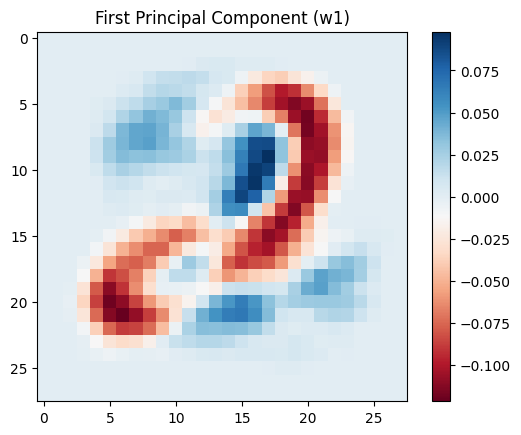

<Figure size 640x480 with 0 Axes>

In [ ]:
# Enter your solution here

plt.imshow(w1.reshape(28,28), cmap = 'RdBu')
plt.title("First Principal Component (w1)")

plt.colorbar()

plt.show()
plt.clf()

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

the value of k is: 53




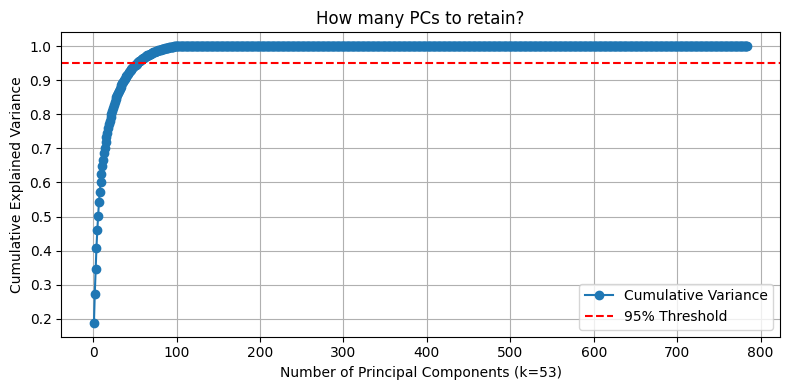

<Figure size 640x480 with 0 Axes>

In [ ]:
# Enter your solution here

explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted) # get the variance ratio

cumulative_variance = np.cumsum(explained_variance_ratio) # get the cumulative sum

k = np.argmax(cumulative_variance >= 0.95) +1 # +1 bcz argmax starts counting from 0.
print(f"the value of k is: {k}\n\n")

###########This scree plot is powered by ChatGPT################
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.axhline(0.95, color='r', linestyle='--', label='95% Threshold')
plt.xlabel(f'Number of Principal Components (k={k})')
plt.ylabel('Cumulative Explained Variance')
plt.title('How many PCs to retain?')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
###########This scree plot was powered by ChatGPT################
plt.clf()

## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



In [ ]:
# Enter your solution here

k_pcs_20 = np.argmax(cumulative_variance >= 0.20) +1
k_pcs_50 = np.argmax(cumulative_variance >= 0.50) +1
k_pcs_80 = np.argmax(cumulative_variance >= 0.80) +1
k_pcs_95 = np.argmax(cumulative_variance >= 0.95) +1


k_values = [k_pcs_20, k_pcs_50, k_pcs_80, k_pcs_95] # all k-values listed

# test_img = test_image[2].flatten() # flat it down

test_img_centered = test_image - np.mean(X, axis = 0)
tic = test_img_centered

# hold on tight,
reconstructions = [] # main list[]

for k in k_values:
  top_k_eigenvecs = eigenvecs[:, sorted_indices[:k]] # get the indices till k
  coeffs = np.dot(tic, top_k_eigenvecs) # get k-th dimension
  reconst = coeffs @ top_k_eigenvecs.T # nothing spacial, we are just pouring water onto all of our work (back to 784-D; then add mean to it)
  reconst += np.mean(X, axis=0) # but it seems like, insted of ruining, it became a sweet long 784-D sapling :)
  reconstructions.append(reconst) # append all reconstructed value to the main list[].






############################################

k=2 (#PCs=2) | Cumulative Variance: 27.41%

k=6 (#PCs=6) | Cumulative Variance: 50.21%

k=22 (#PCs=22) | Cumulative Variance: 80.20%

k=53 (#PCs=53) | Cumulative Variance: 95.08%

############################################

it takes 784 feature dimensions to get the Original image.
While we are only using k = 53 ; The top number of pcs to explain 95%ile of this MNIST image

############################################



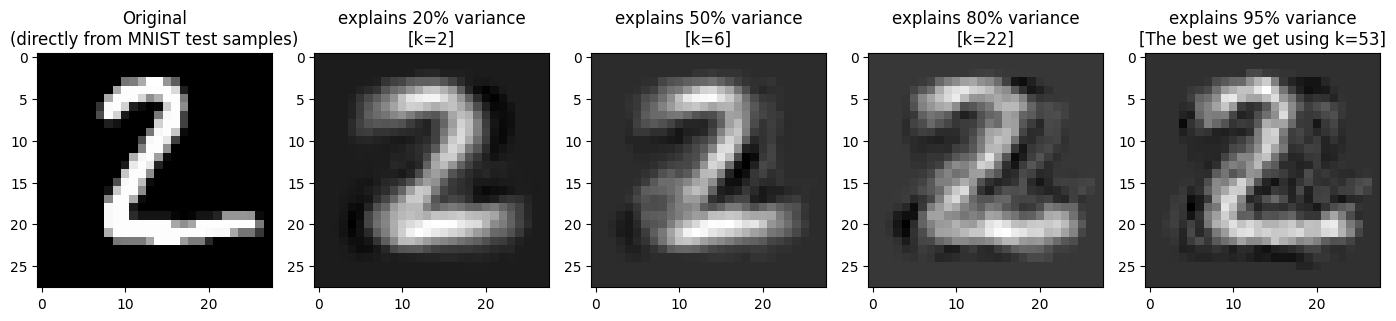

<Figure size 640x480 with 0 Axes>

In [ ]:
# code done, now lets visualize it side by side

original_img_for_display = test_image.reshape(28, 28)

reconstructed_imgs_for_display = [img.reshape(28, 28) for img in reconstructions]

all_imgs = [original_img_for_display] + reconstructed_imgs_for_display

titles = ["Original\n(directly from MNIST test samples)", f"explains 20% variance\n[k={k_pcs_20}]", f"explains 50% variance\n[k={k_pcs_50}]", f"explains 80% variance\n[k={k_pcs_80}]", f"explains 95% variance\n[The best we get using k={k}]"]

plt.figure(figsize=(14,3)) # to make it look bigger and organized



# codes to beautify the output
# used this for annotations
print('\n############################################\n')

for i, k in enumerate(k_values):
    print(f"k={k} (#PCs={k}) | Cumulative Variance: {cumulative_variance[k-1]:.2%}\n")


# used this for annotations
print('############################################\n')
print(f"it takes {d} feature dimensions to get the Original image.\nWhile we are only using k = {k} ; The top number of pcs to explain 95%ile of this MNIST image\n")
print('############################################\n')


# used for loop to get subplots
for i in range(5):
    plt.subplot(1,5,i+1)
    # plt.imshow(all_imgs[i], cmap = "RdBu") # in Red-Blue-scale
    plt.imshow(all_imgs[i], cmap = "gray") # in gray-scale
    plt.title(titles[i])


plt.tight_layout()
plt.show()
plt.clf()

**Thank you :)**